```
[Title] Autoencoder using Tensorflow.Keras
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents]
 - Aucoencoder for Dimension Reduction
[References]
 - https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450
 - https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95
```

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [2]:
trainFeatures = np.array([
  [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,1,1]
, [1,2,3]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [2,2,2]
, [1,3,5]
])
print(trainFeatures)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 3 5]]


In [3]:
encoding_dim = 2
input_img = Input(shape=(3,))
encoded = Dense(encoding_dim)(input_img)
decoded = Dense(3)(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [4]:
autoencoder.fit(trainFeatures, trainFeatures,
                epochs=100,
                batch_size=2,
                verbose=0,
                shuffle=True)

In [5]:
decoded_imgs = autoencoder.predict(trainFeatures)

In [6]:
decoded_imgs

array([[1.1238575, 1.0609558, 1.2607241],
       [1.1238575, 1.0609558, 1.2607241],
       [1.1238575, 1.0609558, 1.2607241],
       [1.1238575, 1.0609558, 1.2607241],
       [1.1910183, 2.0839052, 2.594913 ],
       [1.800581 , 1.9222975, 2.1498702],
       [1.800581 , 1.9222975, 2.1498702],
       [1.800581 , 1.9222975, 2.1498702],
       [1.800581 , 1.9222975, 2.1498702],
       [1.2581792, 3.1068552, 3.9291024]], dtype=float32)

In [7]:
error = trainFeatures - decoded_imgs

In [8]:
error_square = error**2
error_square

array([[0.01534068, 0.00371561, 0.06797704],
       [0.01534068, 0.00371561, 0.06797704],
       [0.01534068, 0.00371561, 0.06797704],
       [0.01534068, 0.00371561, 0.06797704],
       [0.03648801, 0.00704009, 0.16409547],
       [0.03976795, 0.00603768, 0.02246106],
       [0.03976795, 0.00603768, 0.02246106],
       [0.03976795, 0.00603768, 0.02246106],
       [0.03976795, 0.00603768, 0.02246106],
       [0.06665649, 0.01141802, 1.14682163]])

In [9]:
error_square = np.sum(error_square, axis=1)
error_square

array([0.08703332, 0.08703332, 0.08703332, 0.08703332, 0.20762357,
       0.06826669, 0.06826669, 0.06826669, 0.06826669, 1.22489614])

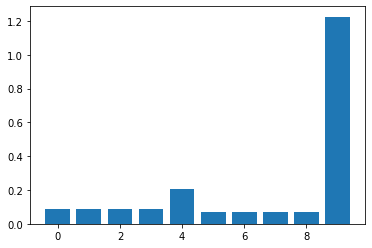

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
ind = np.arange(10) 
plt.bar(ind, error_square)
plt.show()